<a href="https://colab.research.google.com/github/HaidyTalaat/Performing-EDA-Gain-Insights-fom-Customer-Data/blob/main/EDA_%26_Gain_Insights_from_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. About Dataset**
>**The "E-commerce Customer Behavior and Purchase Dataset" is a synthetic dataset that simulates a comprehensive e-commerce environment, capturing various aspects of customer behavior and purchase history within a digital marketplace. This dataset has been designed for data analysis and predictive modeling in the field of e-commerce.**


# **2. Data Description**
>**The dataset contains the following columns:**

**1. Customer ID: A unique identifier for each customer.<br>**
**2. Customer Name: The name of the customer.<br>**
**3. Customer Age: The age of the customer.<br>**
**4. Gender: The gender of the customer.<br>**
**5. Purchase Date: The date of each purchase made by the customer.<br>**
**6. Product Category: The category or type of the purchased product.<br>**
**7. Product Price: The price of the purchased product.<br>**
**8. Quantity: The quantity of the product purchased.<br>**
**9. Total Purchase Amount: The total amount spent by the customer in each transaction.<br>**
**10. Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).<br>**
**11. Returns: Whether the customer returned any products from the order (binary: 0 for no return, 1 for return).<br>**
**12. Churn: A binary column indicating whether the customer has churned (0 for retained, 1 for churned).<br>**

#  **3. Dataset Link on Kaggle:**
https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis



# **4.Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns


# **5.Data Understanding & Preprocessing**

**5.1 Data Understanding**

In [ ]:
df=pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [ ]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [ ]:
df.shape

(250000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


**check numerical and categorical columns:**

In [ ]:
categorical_columns=list(df.select_dtypes(include='object').columns)
numerical_columns=list(df.select_dtypes(include=['float64','int64']).columns)
print(f"There are {len(categorical_columns)} Categorical columns: {categorical_columns}")
print(f"There are {len(numerical_columns)} Numerical columns: {numerical_columns}")
print(f"Total number of columns :{len(numerical_columns)+len(categorical_columns)}")


There are 5 Categorical columns: ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']
There are 8 Numerical columns: ['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Age', 'Churn']
Total number of columns :13


**5.2 Data Preprocessing**

**5.2.1 Convert Date to Datetime and extract day,month,year**

In [ ]:
df['Purchase Date']=pd.to_datetime(df['Purchase Date'])
df['Purchase Date']

0        2020-09-08 09:38:32
1        2022-03-05 12:56:35
2        2022-05-23 18:18:01
3        2020-11-12 13:13:29
4        2020-11-27 17:55:11
                 ...        
249995   2023-08-10 13:39:06
249996   2021-11-23 01:30:42
249997   2020-07-02 14:04:48
249998   2020-12-30 02:02:40
249999   2021-03-13 16:28:35
Name: Purchase Date, Length: 250000, dtype: datetime64[ns]

In [ ]:
df['year']=df['Purchase Date'].dt.year
df['month']=df['Purchase Date'].dt.month
df['day']=df['Purchase Date'].dt.day_name()


In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,year,month,day
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,2020,9,Tuesday
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,3,Saturday
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022,5,Monday
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,2020,11,Thursday
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,2020,11,Friday


**5.2.2 Removing `Age` column as it's excatly the same column as `Customer Age`**

In [ ]:
df.drop(columns='Age',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
 12  year                   250000 non-null  int3

**5.2.3 Check for null values:**

In [ ]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Gender                       0
Churn                        0
year                         0
month                        0
day                          0
dtype: int64

**I will remove the rows not only the null values from the `Returns` column,which means I will remove `47596` row.**

In [ ]:

df=df[df['Returns'].notna()]

**To confirm that the null values has been removed as rows from dataset not only from the column where it existed**

In [ ]:
df.shape

(202404, 15)

In [ ]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Gender                   0
Churn                    0
year                     0
month                    0
day                      0
dtype: int64

**5.2.4 Check for duplicate values:**

In [ ]:
df.duplicated().sum()

0

**There isn't any duplicated values in all columns as there are unique columns like: `Customer ID`,`Customer Name`.**
>**SO I will try to drop `Customer ID` Column from dataset and see what is the number of duplicated values after that.**

# **Trying to drop `Customer ID` Column :**

In [ ]:
dff=df.copy()
dff

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,year,month,day
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,Male,0,2020,9,Tuesday
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,Male,0,2022,3,Saturday
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,Male,0,2022,5,Monday
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,Male,0,2020,11,Thursday
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,Female,1,2020,11,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,Male,1,2023,8,Thursday
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,Female,1,2021,11,Tuesday
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,Male,0,2020,7,Thursday
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,Female,1,2020,12,Wednesday


In [ ]:
dff.drop(columns='Customer ID',inplace=True)


**Confirm that `Customer ID` has been removed.**

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202404 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Purchase Date          202404 non-null  datetime64[ns]
 1   Product Category       202404 non-null  object        
 2   Product Price          202404 non-null  int64         
 3   Quantity               202404 non-null  int64         
 4   Total Purchase Amount  202404 non-null  int64         
 5   Payment Method         202404 non-null  object        
 6   Customer Age           202404 non-null  int64         
 7   Returns                202404 non-null  float64       
 8   Customer Name          202404 non-null  object        
 9   Gender                 202404 non-null  object        
 10  Churn                  202404 non-null  int64         
 11  year                   202404 non-null  int32         
 12  month                  202404 non-null  int32    

In [ ]:
# To show whether there are duplicated values after removing ID column
dff.duplicated().sum()

0

# **Observation:**<br>
**As seen removing `Customer ID` column doesn't affect number of duplicates ,So I will keep it in the original dataset `df`.**

# **6. Data Analysis**

**6.1 Showing total revenue and average transaction value.**

In [ ]:
total_revenue=df['Total Purchase Amount'].sum()
print(f"Total Revenue for all transactions : {total_revenue}")

Total Revenue for all transactions : 551577377


In [ ]:
average_revenue=df['Total Purchase Amount'].mean()
print(f"Average Revenue for all transactions : {average_revenue}")

Average Revenue for all transactions : 2725.1308126321615


**6.2 Show the top 5 highest spending customers.**

In [ ]:
df['Customer ID'].value_counts()

Customer ID
12529    14
26977    14
20762    13
20305    13
14400    13
         ..
24423     1
15281     1
8967      1
3379      1
16971     1
Name: count, Length: 49139, dtype: int64

In [ ]:
top5_ids=list(df['Customer ID'].value_counts().head(5).index)
top5_ids

[12529, 26977, 20762, 20305, 14400]

**These are the Ids of top 5 customers,I will connect these Ids to their names by using the column `Customer Name`**

In [ ]:
top5_names = df[df['Customer ID'].isin(top5_ids)]['Customer Name'].unique()
print("Top 5 Customer Names:", list(top5_names))

Top 5 Customer Names: ['Patricia Petersen', 'Susan Burton', 'Randall Hobbs', 'Whitney Medina', 'Felicia Escobar']


**6.3 Determine the busiest sales day of the week**

In [ ]:
days_distribution=df['day'].value_counts()
days_distribution

day
Wednesday    29227
Friday       29043
Thursday     29021
Monday       28979
Tuesday      28735
Saturday     28706
Sunday       28693
Name: count, dtype: int64

In [ ]:
most_frequent_day=list(df['day'].value_counts().head(1).index)
print(f"The busiest sales day of the week : {most_frequent_day}")

The busiest sales day of the week : ['Wednesday']


**6.4 Calculating monthly sales growth rate**

In [ ]:
sales_per_month=df.groupby('month')['Total Purchase Amount'].sum().reset_index()
sales_per_month

,month,Total Purchase Amount
0,1,50508113
1,2,46353669
2,3,51046772
3,4,48370341
4,5,50203519
5,6,49446711
6,7,50670654
7,8,50508991
8,9,41972227
9,10,37783284


In [ ]:
sales_per_month['growth_rate']=sales_per_month['Total Purchase Amount'].pct_change()*100
sales_per_month

,month,Total Purchase Amount,growth_rate
0,1,50508113,NaN
1,2,46353669,-8.225300
2,3,51046772,10.124556
3,4,48370341,-5.243095
4,5,50203519,3.789880
5,6,49446711,-1.507480
6,7,50670654,2.475277
7,8,50508991,-0.319047
8,9,41972227,-16.901474
9,10,37783284,-9.980273


**6.5  Identify the top 3 most popular `Product Category`**

In [ ]:
df['Product Category'].nunique()

4

In [ ]:
df['Product Category'].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

In [ ]:
top3_types=list(df['Product Category'].value_counts().head(3).index)
print(f"The top 3 most popular product categories : {top3_types}")


The top 3 most popular product categories : ['Clothing', 'Books', 'Electronics']


**If I want to show more visualization on percentage for each `Product Category`**

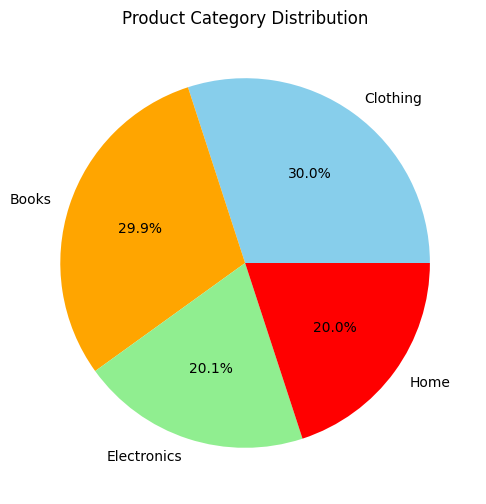

In [ ]:
product_types_number=df['Product Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(product_types_number, labels=product_types_number.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title('Product Category Distribution')
plt.show()

**6.6 Determine the most frequently used `Payment Type`**

In [ ]:
payment_methods=df['Payment Method'].value_counts()
payment_methods

Payment Method
Credit Card    81394
PayPal         60603
Cash           40406
Crypto         20001
Name: count, dtype: int64

In [ ]:
most_frequent_payment_method=df['Payment Method'].value_counts().idxmax()
print(f"The most frequent payment method : {most_frequent_payment_method}")

The most frequent payment method : Credit Card


**Visualization of Payment Methods Distribution**

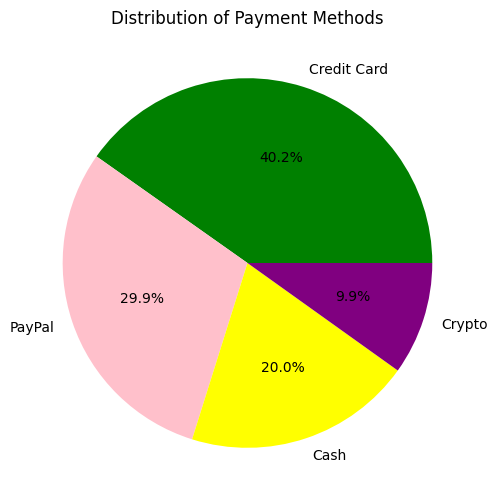

In [ ]:
payment_methods=df['Payment Method'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', colors=['green', 'pink', 'yellow', 'purple'])
plt.title('Distribution of Payment Methods')
plt.show()

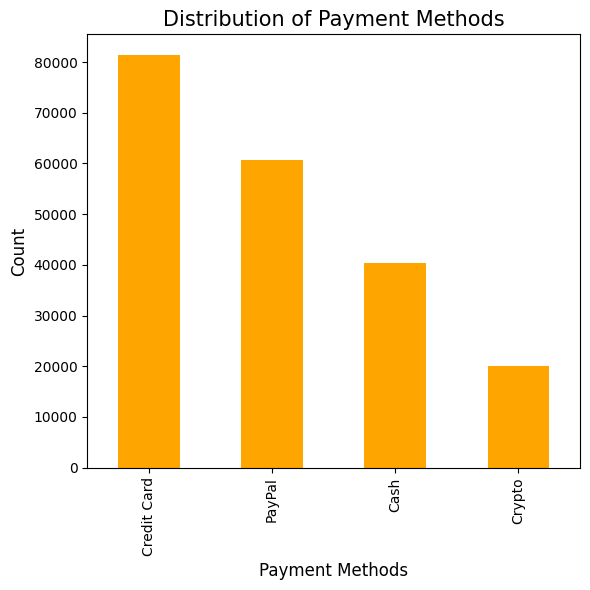

In [ ]:
plt.figure(figsize=(6,6))
payment_methods.plot(kind='bar',color='orange')
plt.title('Distribution of Payment Methods', fontsize=15)
plt.xlabel("Payment Methods",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.tight_layout()
plt.show()

# **Observation on `Customer ID` Column**

In [ ]:
df.nunique()

Customer ID               49139
Purchase Date            202223
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5244
Payment Method                4
Customer Age                 53
Returns                       2
Customer Name             39547
Gender                        2
Churn                         2
year                          4
month                        12
day                           7
dtype: int64

In [ ]:
df['Customer ID'].nunique()

49139

In [ ]:
len(df['Customer ID'])

202404

# **Insights on `Customer ID` column:**
**There are only `49673` unique Id value from `250000` this means that :<br>**
**1.The same customer buys more than one item in the same time or in different times.<br>**
**2.The customer has the same unique identifier whenever it buys it will be using the same ID.**

# **7. Advanced Data Visualization :**

**7.1 Display monthly revenue trends for each product category**

In [ ]:
monthly_sales_per_category=df.groupby(['month','Product Category'])['Total Purchase Amount'].sum().reset_index()
monthly_sales_per_category

,month,Product Category,Total Purchase Amount
0,1,Books,15305798
1,1,Clothing,15258674
2,1,Electronics,10018307
3,1,Home,9925334
4,2,Books,13984601
5,2,Clothing,13908090
6,2,Electronics,9387838
7,2,Home,9073140
8,3,Books,15269684
9,3,Clothing,15291844


<Axes: xlabel='month', ylabel='Total Purchase Amount'>

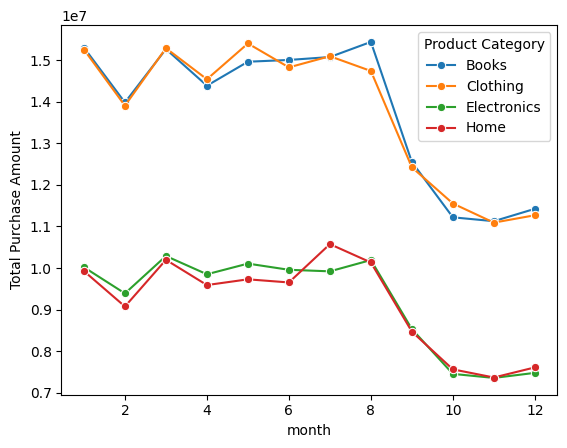

In [ ]:
sns.lineplot(
    data=monthly_sales_per_category,
    x='month',
    y='Total Purchase Amount',
    hue='Product Category',
    marker='o'

)


**7.2 Show the distribution of sales by payment type**

In [ ]:
sales_by_paymaent_type=df.groupby('Payment Method')['Total Purchase Amount'].sum()
sales_by_paymaent_type

Payment Method
Cash           109971818
Credit Card    222023413
Crypto          54498179
PayPal         165083967
Name: Total Purchase Amount, dtype: int64

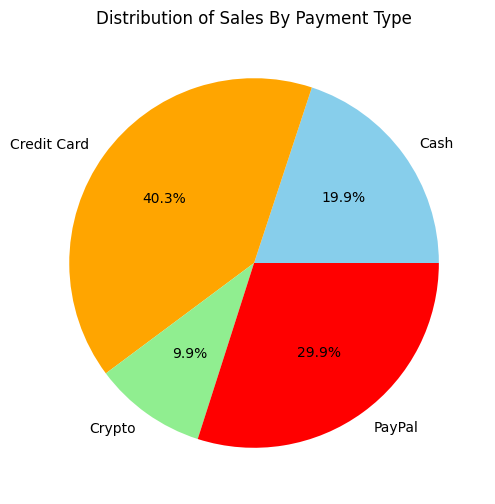

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sales_by_paymaent_type, labels=sales_by_paymaent_type.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title('Distribution of Sales By Payment Type')
plt.show()

**7.3 Distribution of transaction amounts**

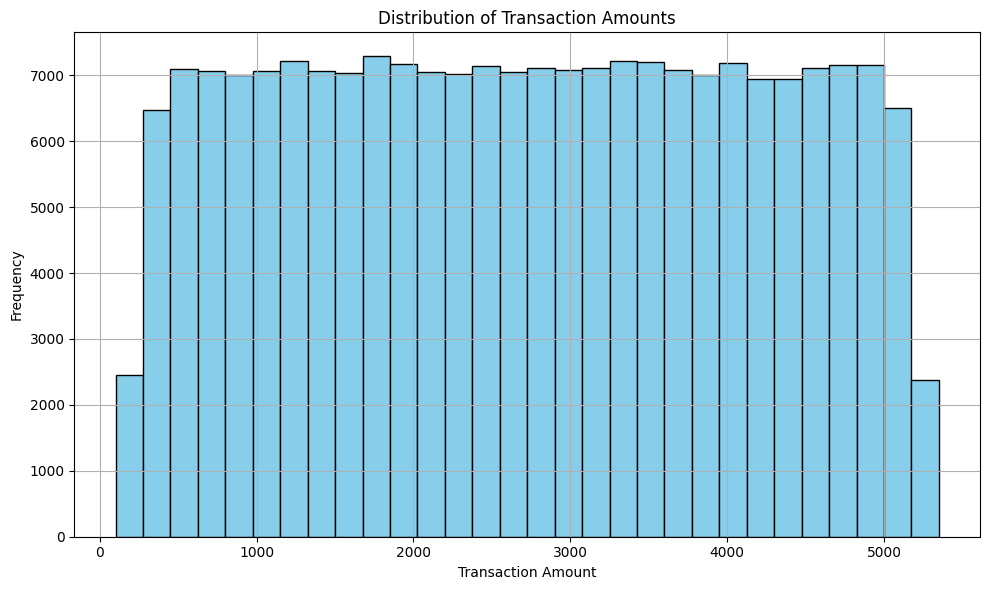

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Total Purchase Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


**From Histogram that illustrates Transaction Distribution it shows that :**<br>
**1. Data has a balanced distribution of transaction amounts.**<br>
**2. Customers are spending across a wide range as there’s no heavy concentration in one particular value range which leads to that there is very very few outliers.**

**7.4 Compare sales performance across different regions over time**

**Dataset actually doesn't contain any location information, So let’s randomly generate a `Region` column that holds different name of countries**

In [ ]:
countries = ['Egypt', 'Saudi Arabia', 'UAE', 'Jordan', 'Morocco', 'Tunisia', 'Lebanon', 'Qatar','Kweit','Emirates']
np.random.seed(42)
df['Region'] = np.random.choice(countries, size=len(df))


In [ ]:
df['Region']

0              Lebanon
1               Jordan
2                Qatar
3              Morocco
4              Lebanon
              ...     
249995         Tunisia
249996    Saudi Arabia
249997           Kweit
249998           Qatar
249999          Jordan
Name: Region, Length: 202404, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202404 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202404 non-null  int64         
 1   Purchase Date          202404 non-null  datetime64[ns]
 2   Product Category       202404 non-null  object        
 3   Product Price          202404 non-null  int64         
 4   Quantity               202404 non-null  int64         
 5   Total Purchase Amount  202404 non-null  int64         
 6   Payment Method         202404 non-null  object        
 7   Customer Age           202404 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          202404 non-null  object        
 10  Gender                 202404 non-null  object        
 11  Churn                  202404 non-null  int64         
 12  year                   202404 non-null  int32    

In [ ]:
region_sales_per_month = df.groupby(['month', 'Region'])['Total Purchase Amount'].sum().reset_index()
region_sales_per_month

,month,Region,Total Purchase Amount
0,1,Egypt,5027481
1,1,Emirates,5059574
2,1,Jordan,4900567
3,1,Kweit,5127513
4,1,Lebanon,4999194
...,...,...,...
115,12,Morocco,3648967
116,12,Qatar,3807964
117,12,Saudi Arabia,3993276
118,12,Tunisia,3817715


In [ ]:
pivot_df = region_sales_per_month.pivot(index='month', columns='Region', values='Total Purchase Amount')
pivot_df

Region,Egypt,Emirates,Jordan,Kweit,Lebanon,Morocco,Qatar,Saudi Arabia,Tunisia,UAE
month,,,,,,,,,,
1,5027481,5059574,4900567,5127513,4999194,5088565,5046893,5227628,4941265,5089433
2,4765152,4756766,4634149,4506799,4841570,4638237,4524493,4568821,4495457,4622225
3,5286561,5299301,5102989,5156421,5064978,4984822,5064948,4973250,5146892,4966610
4,4597555,5056025,4837375,4940662,4836606,4857224,4749967,4876817,4899016,4719094
5,4913030,4920499,5175356,4931202,4982331,5156065,4898338,5017768,5151266,5057664
6,4906485,4970547,5132233,5155192,4718930,4777207,4882062,5140935,5024982,4738138
7,5243654,4976280,5056479,5108554,5073028,5200501,5210534,4814249,5010493,4976882
8,5188579,5081502,5004823,4884721,5113650,5125095,5199095,4875091,5022783,5013652
9,4280259,4297009,3906675,4104207,4171879,4364807,4177668,4308079,4249985,4111659


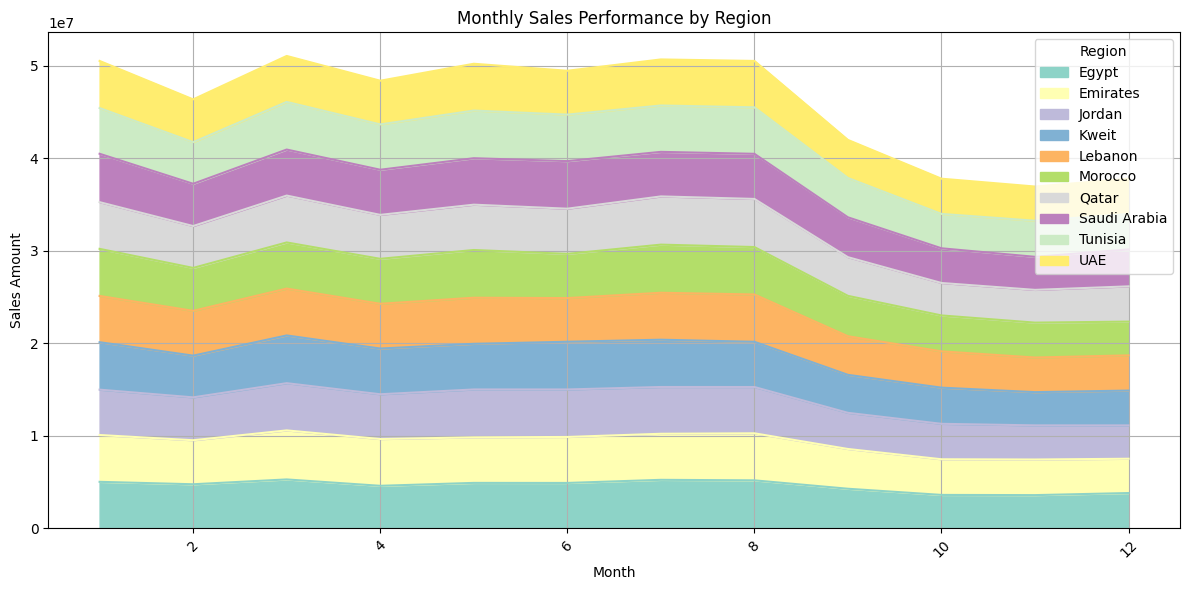

In [ ]:
pivot_df.plot(kind='area', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Monthly Sales Performance by Region')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)  #
plt.grid(True)
plt.tight_layout()
plt.show()

# **8. More Advanced Analysis and Visualization**

**8.1 Calculate  of customer retention rate based on repeat purchases**

In [ ]:
df['Customer ID'].nunique()

49139

In [ ]:
len(df['Customer ID'])

202404

**This ensures that that are more than `150000` repeated purchases**

In [ ]:
customer_purchases=df.groupby('Customer ID')['Purchase Date'].count()
customer_purchases

Customer ID
1        1
2        2
3        7
4        1
5        6
        ..
49996    3
49997    7
49998    2
49999    1
50000    1
Name: Purchase Date, Length: 49139, dtype: int64

In [ ]:
repeated_customers=customer_purchases[customer_purchases>1].count()
repeated_customers

45613

In [ ]:
total_customers = customer_purchases.count()
total_customers

49139

In [ ]:
retention_rate = (repeated_customers / total_customers) * 100
print(f"Customer Retention Rate: {retention_rate} %")

Customer Retention Rate: 92.82443680172572 %


**8.2 Compare average spending per region**

In [ ]:
average_per_region=df.groupby('Region')['Total Purchase Amount'].mean().reset_index()
average_per_region

,Region,Total Purchase Amount
0,Egypt,2724.500740
1,Emirates,2721.702842
2,Jordan,2721.480137
3,Kweit,2746.995669
4,Lebanon,2719.879435
5,Morocco,2726.637235
6,Qatar,2720.863079
7,Saudi Arabia,2717.832733
8,Tunisia,2728.373374
9,UAE,2723.206492


**visualization for better comparison**

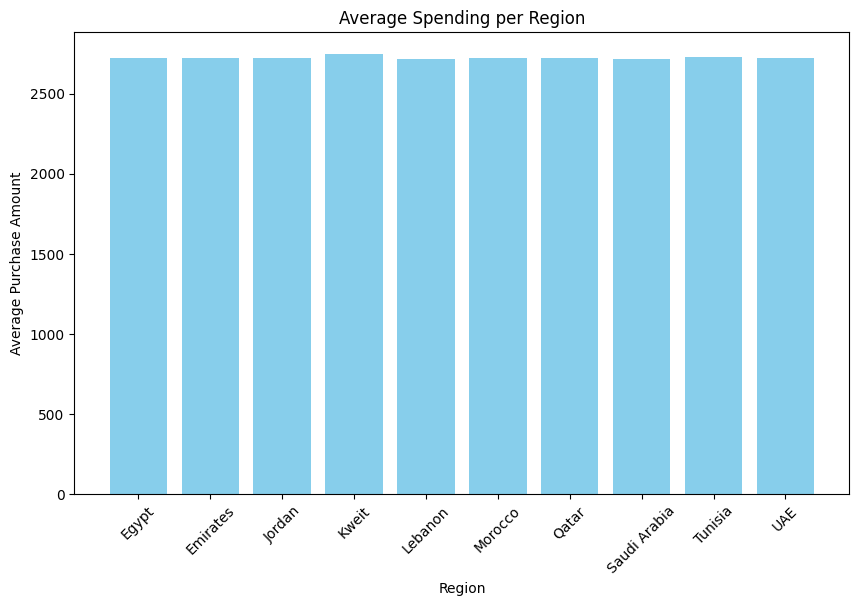

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(average_per_region['Region'], average_per_region['Total Purchase Amount'], color='skyblue')
plt.title('Average Spending per Region')
plt.xlabel('Region')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()


**8.3  Analyze the correlation between the number of units purchased and the total amount spent**

In [ ]:
correlation = df['Quantity'].corr(df['Total Purchase Amount'])

print(f" Correlation between Units Purchased and Total Purchase Amount: {correlation}")

 Correlation between Units Purchased and Total Purchase Amount: 0.0011936625666869405


**8.4  Heatmap  to show sales trends by weekday and hour**

**first we need to extrct hour from date as we extracted before yeas,month,weekday**

In [ ]:
df['Purchase Date']

0        2020-09-08 09:38:32
1        2022-03-05 12:56:35
2        2022-05-23 18:18:01
3        2020-11-12 13:13:29
4        2020-11-27 17:55:11
                 ...        
249995   2023-08-10 13:39:06
249996   2021-11-23 01:30:42
249997   2020-07-02 14:04:48
249998   2020-12-30 02:02:40
249999   2021-03-13 16:28:35
Name: Purchase Date, Length: 202404, dtype: datetime64[ns]

In [ ]:
df['hour'] = df['Purchase Date'].dt.hour
df['hour']

0          9
1         12
2         18
3         13
4         17
          ..
249995    13
249996     1
249997    14
249998     2
249999    16
Name: hour, Length: 202404, dtype: int32

In [ ]:
sales_by_day_hour = df.groupby(['day', 'hour'])['Total Purchase Amount'].sum().reset_index()
sales_by_day_hour

,day,hour,Total Purchase Amount
0,Friday,0,3377309
1,Friday,1,3467581
2,Friday,2,3232485
3,Friday,3,3597941
4,Friday,4,3326492
...,...,...,...
163,Wednesday,19,3222363
164,Wednesday,20,3308626
165,Wednesday,21,3129427
166,Wednesday,22,3230848


In [ ]:
sales_pivot = sales_by_day_hour.pivot(index='day', columns='hour', values='Total Purchase Amount')
sales_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,3377309,3467581,3232485,3597941,3326492,3073339,3154048,3547763,3318373,3220009,...,3249828,3527937,3415904,3448327,3296838,3207478,3268410,3239263,3368472,3102958
Monday,3334599,3128395,3207961,3179375,3046219,3235292,3524275,3334769,3400706,3122066,...,3259300,3362172,3303168,3426472,3292499,3180120,3142952,3283182,3445922,3456257
Saturday,3187144,3372087,3553506,3293684,3281152,3143152,3231603,3342089,3210955,3299610,...,3095921,3160819,3320130,3408685,3416485,3287491,3183644,3368524,3253721,3419375
Sunday,3453005,3232555,3237678,3138776,3041753,3222807,3345037,3228903,3365879,3292319,...,3214457,3203495,3372826,3419696,3387806,3296480,3222164,3214053,3201011,3218155
Thursday,3444679,3210235,3212743,3130432,3290585,3285684,3355771,3367256,3338465,3080134,...,3258357,3374685,3298973,3276909,3405348,3205441,3462797,3231333,3272670,3217998
Tuesday,3333832,3452887,3318139,3216909,3128654,3285725,3214392,3386282,3413470,3243990,...,3455367,3132103,3274323,3264035,3150752,3316962,3152139,3301904,3293122,3221517
Wednesday,3328571,3141281,3035295,3431523,3360181,3232474,3291144,3281321,3377886,3422361,...,3245057,3259746,3649603,3490703,3415334,3222363,3308626,3129427,3230848,3228220


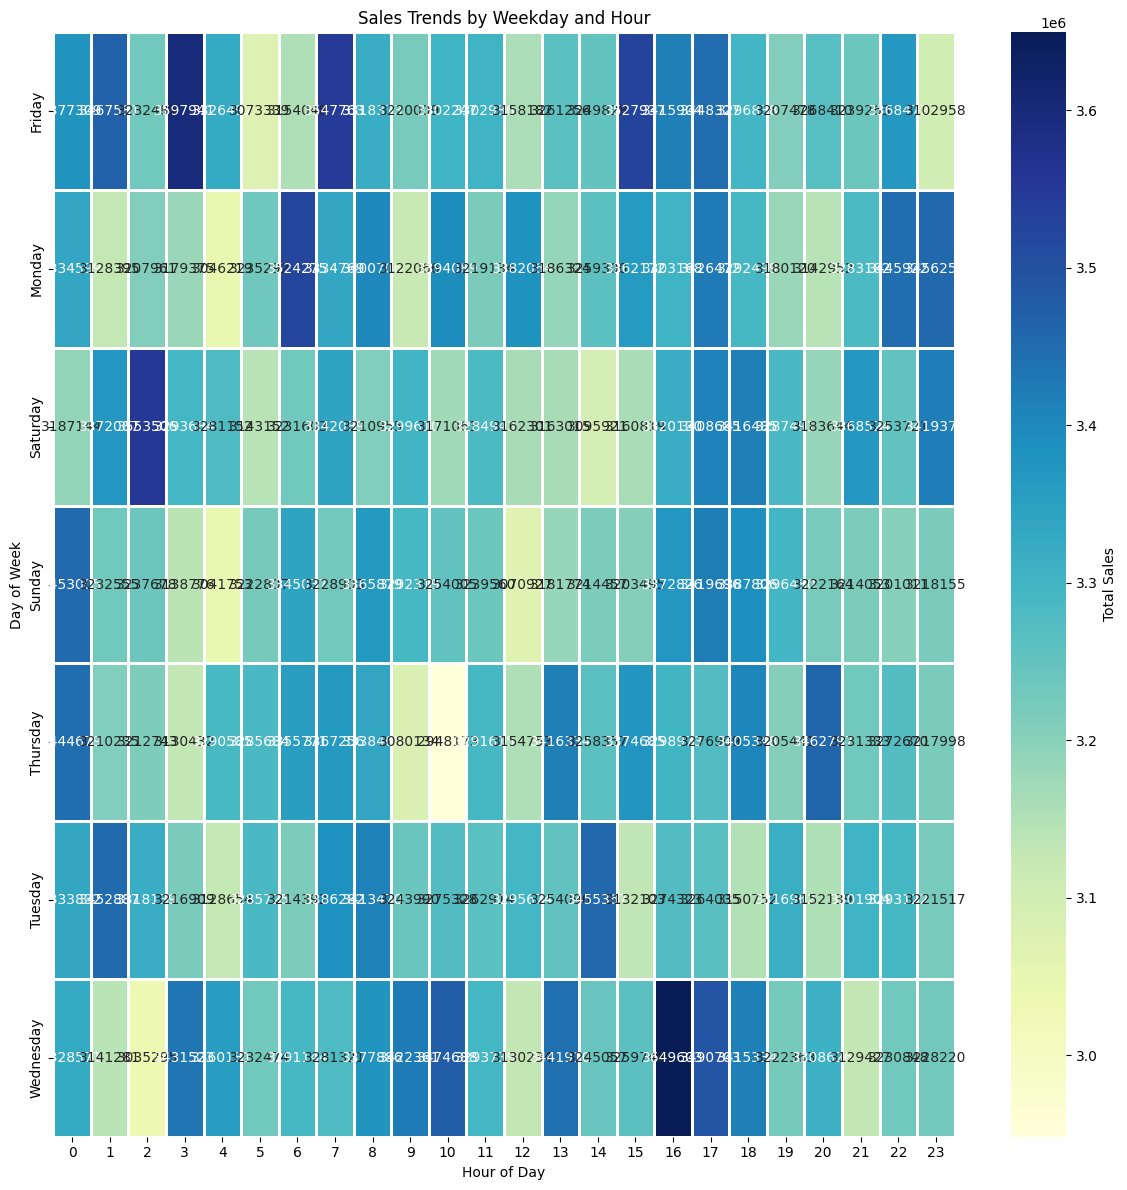

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=1, cbar_kws={'label': 'Total Sales'})
plt.title('Sales Trends by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

mt=',.0f'